### DS102 | In Class Practice Week 5D - Advanced ML Algorithms (Decision Tree)
<hr>

## Learning Objectives
At the end of the lesson, you will be able to:

- apply Decision Trees to a Classification Problem

**Datasets required:**

- `diabetes-500.csv` from [UCI ML Repository (Adapted by Susan Li)](https://raw.githubusercontent.com/susanli2016/Machine-Learning-with-Python/master/diabetes.csv)

Import the libraries & settings. Look at all the libraries we are importing for this notebook!

In [2]:
import re

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# from graphviz import Source # For creating the visualisation of the decision tree

from scipy.stats import entropy
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

#Settings
%matplotlib inline
pd.options.display.float_format = '{:.2f}'.format
# np.set_printoptions(threshold=np.nan)
sns.set()

## Entropy

The Shannon Entropy of a multi-classification problem is

$$
-\sum_{i=1}^{k} p_i \log(p_i) 
$$

where $p_i$ is the probability of the event $i$, $\log$ represents the natural logarithm `np.log` and there are $k$ possible events in total. The higher the entropy, the less information we know about each draw.

A bag has 6 balls.

- Bag $a$ has 6 red balls
- Bag $b$ has 1 red ball, 2 yellow balls, 2 green balls and 1 orange ball
- Bag $c$ has 3 red balls and 3 yellow balls


Construct `a`, `b` and `c` as a list of probabilities. They are representations of each bag. Which bag is expected to have the lowest Shannon's entropy with respect to drawing 1 ball from a bag?

In [4]:
# Bag a
a = [6/6]

# Entropy calculation using sp.stats.entropy
print(entropy(a))

0.0


In [6]:
# Bag b
b = [1/6, 2/6, 2/6, 1/6]

# Entropy calculation using sp.stats.entropy
print(entropy(b))

1.3296613488547582


In [7]:
# Bag c
# Exercise: Construct the list of probabilities for c
c = [3/6, 3/6]

# Entropy calculation using sp.stats.entropy
print(entropy(c))

0.6931471805599453


<div class="alert alert-warning">
Additional notes: You can calculate the Shannon entropy of each of the bags using `np.log()`
</div>

In [8]:
# Entropy calculation using np.log for a, b and c

# This is for a
ent_a = 0
for p in a:
    ent_a = ent_a + (-p*np.log(p))
print(ent_a)

0.0


In [9]:
# This is for b
ent_b = 0.0
for p in b:
    ent_b = ent_b + (-p*np.log(p))
print(ent_b)

1.3296613488547582


In [10]:
# This is for c
# You can use a list comprehension notation to do so.
print(sum([-p*np.log(p) for p in c]))

0.6931471805599453


### Read from CSV File & Exploratory Data Analysis
Read `diabetes-500.csv` into `df`.

In [12]:
df = pd.read_csv('diabetes-500.csv')
display(df.head())
print(df.info())
display(df.describe(include='all'))

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,141,84,26,0,32.40,0.43,22,0
1,4,83,86,19,0,29.30,0.32,34,0
2,1,128,82,17,183,27.50,0.12,22,0
3,9,112,82,32,175,34.20,0.26,36,1
4,2,71,70,27,0,28.00,0.59,22,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
Pregnancies                 500 non-null int64
Glucose                     500 non-null int64
BloodPressure               500 non-null int64
SkinThickness               500 non-null int64
Insulin                     500 non-null int64
BMI                         500 non-null float64
DiabetesPedigreeFunction    500 non-null float64
Age                         500 non-null int64
Outcome                     500 non-null int64
dtypes: float64(2), int64(7)
memory usage: 35.2 KB
None


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00
mean,3.78,121.10,70.21,21.00,82.01,32.14,0.48,33.24,0.35
std,3.28,33.52,17.59,16.01,116.37,7.46,0.34,11.88,0.48
min,0.00,0.00,0.00,0.00,0.00,0.00,0.08,21.00,0.00
25%,1.00,99.00,64.00,0.00,0.00,27.48,0.25,24.00,0.00
50%,3.00,117.00,72.00,23.00,36.00,32.00,0.38,29.00,0.00
75%,6.00,142.00,80.00,33.00,132.75,36.32,0.63,41.00,1.00
max,17.00,199.00,114.00,99.00,744.00,67.10,2.42,81.00,1.00


**Revision Exercise**: Using `df.groupby()`, create a df called `df_outcome` where the first column contains the unique values for `Outcome` and the second column, `n` contains the number of patients for each `Outcome` value.

In [15]:
# Using groupby, find out the number of reviews with
# positive and negative sentiment respectively.
df_outcome = df.groupby('Outcome').size()
df_outcome = df_outcome.reset_index(name= 'n')
display(df_outcome)

,Outcome,n
0,0,326
1,1,174


**Revision Exercise:**: Plot a bar graph where the $x$-axis contains the different values of `Outcome` and the $y$-axis is the number of patients for that outcome, or `n`.

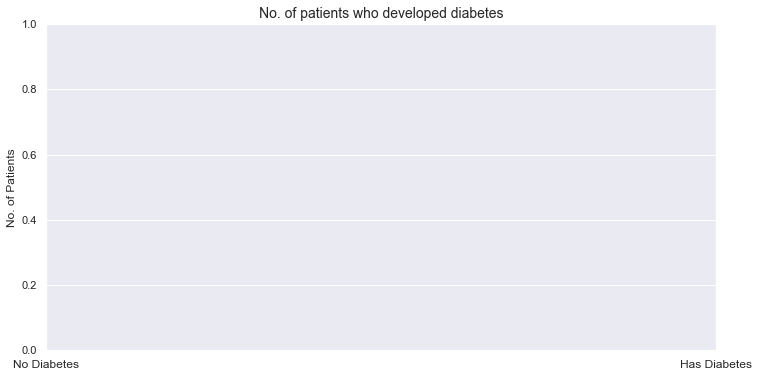

In [16]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)

# Exercise: Plot the bar graph counting the number of patients for each outcome.
# Use color='steelblue' as a parameter.
#

# Additional parameters are given to you.
ax.set_title("No. of patients who developed diabetes", fontsize=14)
ax.set_ylabel("No. of Patients")
ax.set_xticks(np.arange(0,2))
ax.set_xticklabels(["No Diabetes", "Has Diabetes"], fontsize=12)
plt.show()

<hr>
We are now ready to perform the training of the model.

### Decision Trees: Problem Statement

Given the different health indicators of a new patient, classify whether the patient is likely to develop diabetes.

### Create $\textbf{X}$ and $\textbf{y}$, the input variables and target variable

Declare `X` to represent $\textbf{X}$ that contains all the input variables in the model and `y` to represent $\textbf{y}$ which is the target variable, whether the patient has diabetes or not. 

Note: `X` must be a `DataFrame` and `y` must be a `Series`.

In [17]:
# The columns in the df are:
# 'Pregnancies', 'Glucose', 'BloodPressure', 
# 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 
# 'Age', 'Outcome'. Use this to help you.

# Declare X and y
X = df [[
    'Pregnancies', 'Glucose', 'BloodPressure', 
'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 
'Age', 'Outcome']]

y = df['Outcome']

### Train-Test Split
Use `sklearn.model_selection.train_test_split` to split your dataset into two groups - the **training set** and the **test set**. For this example, we set the **test set** to be $20\%$ of the whole dataset.

In [20]:
# Perform train-test split
X_train, X_test, y_train, y_text = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=0)

### TRAIN

Use `model = DecisionTreeClassifier(criterion="entropy")` to instantiate the model. Then, use `model.fit(X, y)` to train the model using the training set.

In [22]:
# Create the model
model = DecisionTreeClassifier(criterion='entropy')

# Use the fit() function to train the decision tree model on the training set
model.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### PREDICT ON TEST SET

With the trained model, use `model.predict(X)` to obtain the predicted classes for each sample in the test set.

In [23]:
# Use the model to predict the outcome on the test set
y_pred = model.predict(X_test)
print(y_pred)

[0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 1 1 0 0 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0 1
 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 1
 0 0 0 1 0 1 1 1 1 1 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 1]


In [24]:
# Find the confusion matrix of the result
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Find the accuracy score of the result
asr = accuracy_score(y_test, y_pred)
print(asr)

NameError: name 'y_test' is not defined

### PREDICT

Use `model.predict()` to predict for a new patient not seen in the training set.

In [ ]:
# The columns in the original df are:
# 'Pregnancies', 'Glucose', 'BloodPressure', 
# 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 
# 'Age', 'Outcome'. Use this to help you.
diabetes_features = ['Pregnancies', 'Glucose', 'BloodPressure', 
                     'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 
                     'Age',]
new_patient_df = pd.DataFrame([[7,196,90,0,0,39.8,0.451,41]], columns=diabetes_features)
display(new_patient_df)

# Use model.predict() to predict the label
#

## Pruning

### TRAIN

Use `model = DecisionTreeClassifier(criterion="entropy")` to instantiate the model. Then, use `model.fit(X, y)` to train the model using the training set. To perform pruning, set `max_depth=3`.

In [ ]:
# Create the model
#

# Use the fit() function to train the decision tree model on the training set
#

### PREDICT ON TEST SET

In [ ]:
# Get the predicted y array
#

In [ ]:
# Find the confusion matrix of the result
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Find the accuracy score of the result
asr = accuracy_score(y_test, y_pred)
print(asr)

### PREDICT

Use `model.predict()` to predict for a new patient not seen in the training set.

In [ ]:
# The columns in the original df are:
# 'Pregnancies', 'Glucose', 'BloodPressure', 
# 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 
# 'Age', 'Outcome'. Use this to help you.
diabetes_features = ['Pregnancies', 'Glucose', 'BloodPressure', 
                     'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 
                     'Age',]
new_patient_df = pd.DataFrame([[7,196,90,0,0,39.8,0.451,41]], columns=diabetes_features)
display(new_patient_df)

# Use model.predict() to predict the label
#

<hr>
<center>$\diamond$</center>
### Further Exploration: Determine Feature Importance

In [ ]:
# Find out the features that have the most importance
print("Feature importances:\n{}".format(dtree_pruned_model.feature_importances_))

In [ ]:
diabetes_features = [x for i,x in enumerate(df.columns) if i!=8]
# Find the full list of features in the dataset
print(diabetes_features)

In [ ]:
feats_df = pd.DataFrame({'labels' : diabetes_features, 'values' : dtree_model.feature_importances_})
display(feats_df)
###
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111)

# Exercise: Plot the bar graph counting the number of patients for each outcome.
# Use color='steelblue' as a parameter.
#
feats_df.plot(kind='barh', x='labels', y='values', ax=ax, color='steelblue')

# Additional parameters are given to you.
ax.set_title("Feature Importance Plot for the Diabetes dataset", fontsize=14)
ax.set_xlabel("Feature importance")
ax.set_ylabel("Feature")
plt.show()

### Further Exploration: Show the Visualisation of the Tree

In [ ]:
# graph = Source(tree.export_graphviz(dtree_pruned_model, out_file=None, feature_names=X.columns))
# graph.view()

**Credits:**
- https://raw.githubusercontent.com/susanli2016/Machine-Learning-with-Python/master/diabetes.csv